In [68]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import os
import sys
import requests
import urllib
from bs4 import BeautifulSoup
from urllib.request import urlopen
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import pandas as pd

url  = "https://home.kahis.go.kr/home/lkntscrinfo/selectLkntsStats.do"

chrome_options = Options()
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")

# Set up the WebDriver
service = Service(executable_path="/home/sungyoon/chromedriver-linux64/chromedriver") 
driver = webdriver.Chrome(service=service, options=chrome_options)

driver.get(url)

time.sleep(3)

print(driver.title)

driver.maximize_window()

element1 = driver.find_element(By.CSS_SELECTOR, "#occrFromDtId")
element1.click()
element1.send_keys("19950101")

element2 = driver.find_element(By.CSS_SELECTOR, "#occrToDtId")
element2.click()
element2.send_keys("20231231")

element3 = driver.find_element(By.CSS_SELECTOR, "#lstkspClId > option:nth-child(10)")
element3.click()

time.sleep(1)
search_btn = driver.find_element(By.CSS_SELECTOR, "#homeLkntscrinfoVO > table:nth-child(5) > tbody > tr > td:nth-child(2) > table:nth-child(1) > tbody > tr > td:nth-child(3) > a > img")
search_btn.click()

for year in range(1995, 2024):
    css_selector = f"#homeLkntscrinfoVO > table:nth-child(5) > tbody > tr > td:nth-child(2) > table:nth-child(2) > tbody > tr:nth-child(3) > td > table > tbody > tr:nth-child({year - 1994}) > td:nth-child(19) > span.had"
    Virus_count = driver.find_element(By.CSS_SELECTOR, css_selector)
    print(year, Virus_count.text)

# Create a list to store the data
data = []

# Collect data for each year
for year in range(1995, 2024):
    css_selector = f"#homeLkntscrinfoVO > table:nth-child(5) > tbody > tr > td:nth-child(2) > table:nth-child(2) > tbody > tr:nth-child(3) > td > table > tbody > tr:nth-child({year - 1994}) > td:nth-child(19) > span.had"
    Virus_count = driver.find_element(By.CSS_SELECTOR, css_selector)
    data.append({"Year": year, "Virus Count": Virus_count.text})

# Create a DataFrame
df_virus = pd.DataFrame(data)

# Display the DataFrame

driver.quit()


Î≤ïÏ†ïÍ∞ÄÏ∂ïÏ†ÑÏóºÎ≥ë Î∞úÏÉùÌÜµÍ≥Ñ
1995 59
1996 393
1997 260
1998 230
1999 48
2000 21,549
2001 27,787
2002 30,155
2003 48,657
2004 15,833
2005 10,862
2006 18,608
2007 15,682
2008 13,857
2009 9,717
2010 4,573
2011 1,342
2012 1,454
2013 5,474
2014 36,108
2015 18,988
2016 9,610
2017 7,586
2018 35,078
2019 29,342
2020 4,679
2021 5,791
2022 21,351
2023 9,026


In [69]:
print(df_virus)

    Year Virus Count
0   1995          59
1   1996         393
2   1997         260
3   1998         230
4   1999          48
5   2000      21,549
6   2001      27,787
7   2002      30,155
8   2003      48,657
9   2004      15,833
10  2005      10,862
11  2006      18,608
12  2007      15,682
13  2008      13,857
14  2009       9,717
15  2010       4,573
16  2011       1,342
17  2012       1,454
18  2013       5,474
19  2014      36,108
20  2015      18,988
21  2016       9,610
22  2017       7,586
23  2018      35,078
24  2019      29,342
25  2020       4,679
26  2021       5,791
27  2022      21,351
28  2023       9,026


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46076 (\N{HANGUL SYLLABLE DWAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGU

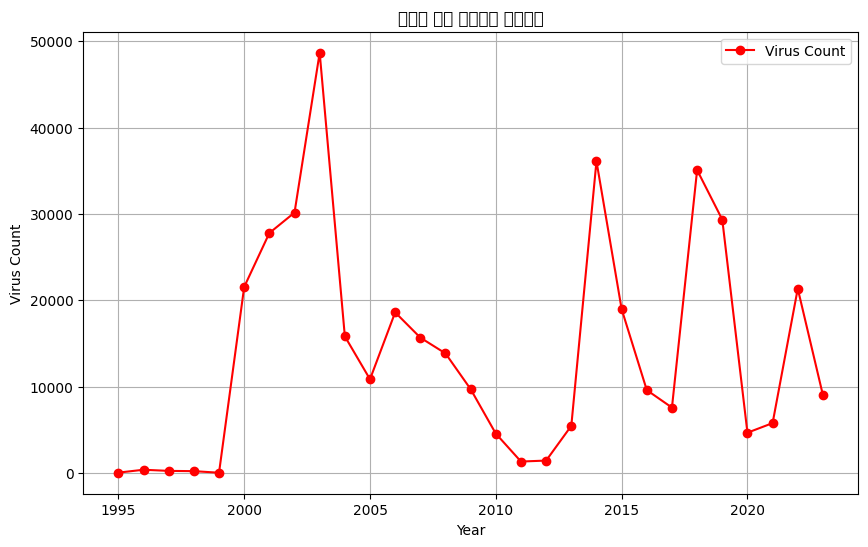

In [70]:
import matplotlib.pyplot as plt

# Ensure Virus Count is numeric for sorting and plotting
df_virus['Virus Count'] = df_virus['Virus Count'].str.replace(',', '').astype(int)

# Sort the DataFrame by Year to ensure correct order
df_virus = df_virus.sort_values(by='Year')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_virus['Year'], df_virus['Virus Count'], marker='o', linestyle='-', color='r', label='Virus Count')

plt.xlabel('Year')
plt.ylabel('Virus Count')
plt.title('Ïó∞ÎèÑÎ≥Ñ ÎèºÏßÄ Î∞îÏù¥Îü¨Ïä§ Î∞úÏÉùÌÜµÍ≥Ñ')
plt.grid(True)
plt.legend()

plt.show()

In [71]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL
url = "http://www.kmta.or.kr/kr/data/stats_price_year.php"

# ÏöîÏ≤≠
response = requests.get(url)
response.encoding = 'utf-8'

# ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')

# Ìëú ÏÑ†ÌÉù
table = soup.select_one("div.contents.p_stats > table")
rows = table.select("tr")

# Ïó∞ÎèÑ Î∞è Í∞í ÏàòÏßë
data = []
start_year = 1993
for i, row in enumerate(rows[2:], start=0):  # Ìó§Îçî 2Ï§Ñ Í±¥ÎÑàÎúÄ
    if start_year + i > 2024:
        break  # 2024ÎÖÑÍπåÏßÄÎßå
    cells = row.find_all("td")
    if len(cells) >= 4:
        value = cells[3].get_text(strip=True)
        year = start_year + i
        data.append({"Ïó∞ÎèÑ": f"{year}", "ÎèÑÏ∂ïÍ∞Ä": value})

# DataFrame ÏÉùÏÑ±
df_price = pd.DataFrame(data)

# Ï∂úÎ†•
print(df_price)

      Ïó∞ÎèÑ    ÎèÑÏ∂ïÍ∞Ä
0   1993  2,151
1   1994  2,373
2   1995  2,298
3   1996  2,490
4   1997  2,422
5   1998  2,514
6   1999  3,017
7   2000  2,499
8   2001  2,599
9   2002  2,645
10  2003  2,444
11  2004  3,479
12  2005  3,730
13  2006  3,649
14  2007  3,247
15  2008  4,046
16  2009  4,449
17  2010  4,232
18  2011  5,808
19  2012  3,974
20  2013  3,570
21  2014  4,741
22  2015  4,939
23  2016  4,617
24  2017  4,947
25  2018  4,362
26  2019  3,843
27  2020  4,216
28  2021  4,722
29  2022  5,227
30  2023  5,134
31  2024  5,239


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SY

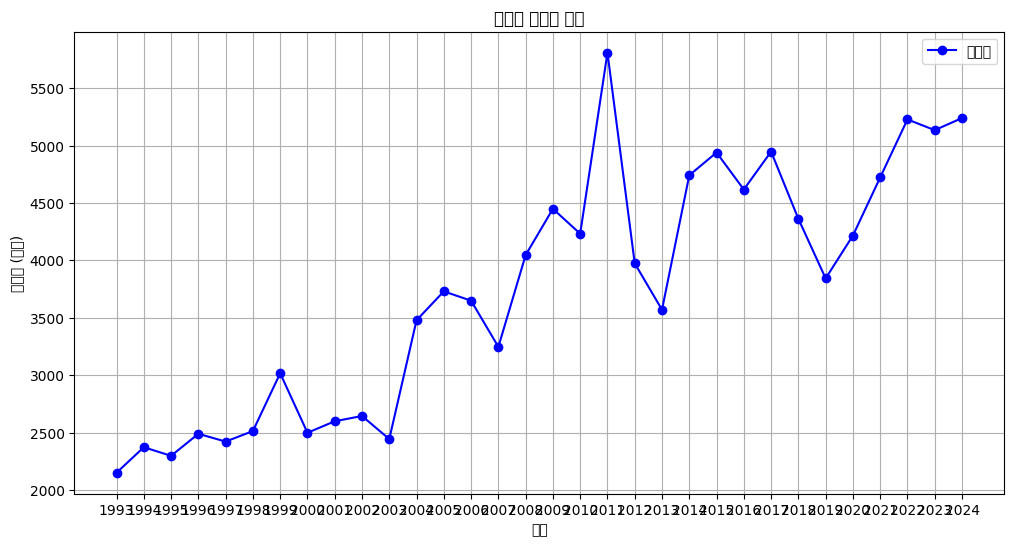

In [72]:
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò: ÎèÑÏ∂ïÍ∞Ä Í∞íÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò
df_price['ÎèÑÏ∂ïÍ∞Ä'] = df_price['ÎèÑÏ∂ïÍ∞Ä'].str.replace(',', '').astype(int)

# ÌîåÎ°úÏö∞Ï∞®Ìä∏ ÏÉùÏÑ±
plt.figure(figsize=(12, 6))
plt.plot(df_price['Ïó∞ÎèÑ'], df_price['ÎèÑÏ∂ïÍ∞Ä'], marker='o', linestyle='-', color='b', label='ÎèÑÏ∂ïÍ∞Ä')

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('ÎèÑÏ∂ïÍ∞Ä (Ï≤úÏõê)')
plt.title('Ïó∞ÎèÑÎ≥Ñ ÎèÑÏ∂ïÍ∞Ä Î≥ÄÌôî')
plt.grid(True)
plt.legend()

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

      Ïó∞ÎèÑ   ÎèÑÏ∂ïÍ∞Ä  Year  Virus Count
0   1995  2298  1995           59
1   1996  2490  1996          393
2   1997  2422  1997          260
3   1998  2514  1998          230
4   1999  3017  1999           48
5   2000  2499  2000        21549
6   2001  2599  2001        27787
7   2002  2645  2002        30155
8   2003  2444  2003        48657
9   2004  3479  2004        15833
10  2005  3730  2005        10862
11  2006  3649  2006        18608
12  2007  3247  2007        15682
13  2008  4046  2008        13857
14  2009  4449  2009         9717
15  2010  4232  2010         4573
16  2011  5808  2011         1342
17  2012  3974  2012         1454
18  2013  3570  2013         5474
19  2014  4741  2014        36108
20  2015  4939  2015        18988
21  2016  4617  2016         9610
22  2017  4947  2017         7586
23  2018  4362  2018        35078
24  2019  3843  2019        29342
25  2020  4216  2020         4679
26  2021  4722  2021         5791
27  2022  5227  2022        21351
28  

/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52629 (\N{HANGU

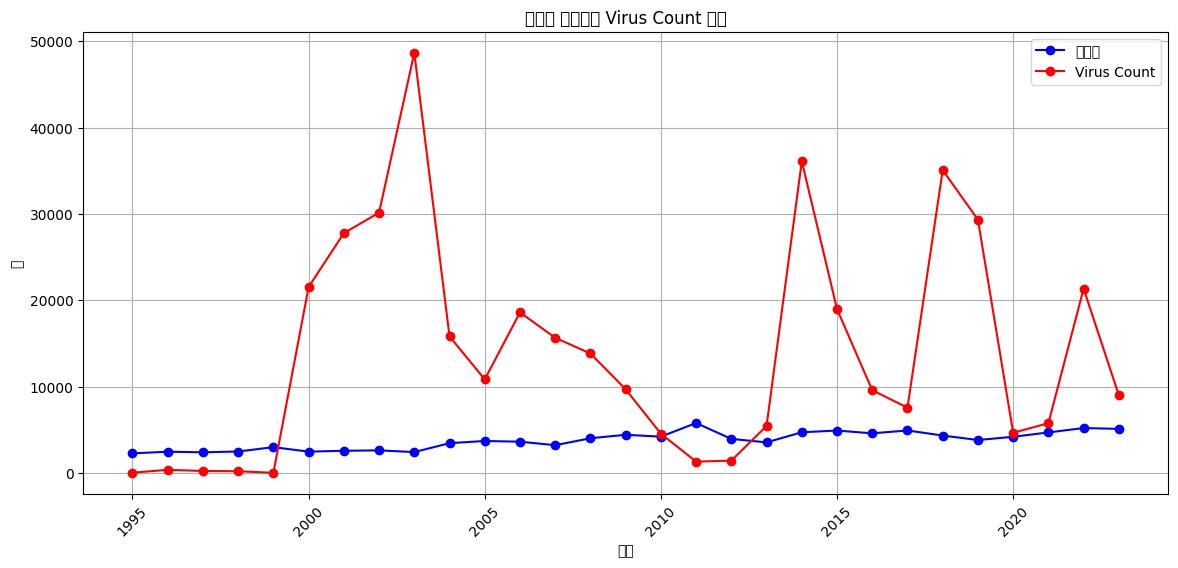

ÏÉÅÍ¥ÄÍ≥ÑÏàò:
                  ÎèÑÏ∂ïÍ∞Ä  Virus Count
ÎèÑÏ∂ïÍ∞Ä          1.000000    -0.053717
Virus Count -0.053717     1.000000


In [83]:
import matplotlib.pyplot as plt
import pandas as pd

df_price['Ïó∞ÎèÑ'] = df_price['Ïó∞ÎèÑ'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)

# Î≥ëÌï©
df_merged = pd.merge(df_price, df_virus, left_on='Ïó∞ÎèÑ', right_on='Year')

# Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(df_merged)

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.figure(figsize=(14, 6))

# ÎèÑÏ∂ïÍ∞Ä Í∑∏ÎûòÌîÑ
plt.plot(df_merged['Ïó∞ÎèÑ'], df_merged['ÎèÑÏ∂ïÍ∞Ä'], marker='o', linestyle='-', color='b', label='ÎèÑÏ∂ïÍ∞Ä')

# Virus Count Í∑∏ÎûòÌîÑ
plt.plot(df_merged['Ïó∞ÎèÑ'], df_merged['Virus Count'], marker='o', linestyle='-', color='r', label='Virus Count')

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('Í∞í')
plt.title('Ïó∞ÎèÑÎ≥Ñ ÎèÑÏ∂ïÍ∞ÄÏôÄ Virus Count Î≥ÄÌôî')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # XÏ∂ï Î†àÏù¥Î∏î ÌöåÏ†Ñ
# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
correlation = df_merged[['ÎèÑÏ∂ïÍ∞Ä', 'Virus Count']].corr()
print("ÏÉÅÍ¥ÄÍ≥ÑÏàò:")
print(correlation)

      Ïó∞ÎèÑ   ÎèÑÏ∂ïÍ∞Ä  Year  Virus Count
0   1995  2298  1995           59
1   1996  2490  1996          393
2   1997  2422  1997          260
3   1998  2514  1998          230
4   1999  3017  1999           48
5   2000  2499  2000        21549
6   2001  2599  2001        27787
7   2002  2645  2002        30155
8   2003  2444  2003        48657
9   2004  3479  2004        15833
10  2005  3730  2005        10862
11  2006  3649  2006        18608
12  2007  3247  2007        15682
13  2008  4046  2008        13857
14  2009  4449  2009         9717
15  2010  4232  2010         4573
16  2011  5808  2011         1342
17  2012  3974  2012         1454
18  2013  3570  2013         5474
19  2014  4741  2014        36108
20  2015  4939  2015        18988
21  2016  4617  2016         9610
22  2017  4947  2017         7586
23  2018  4362  2018        35078
24  2019  3843  2019        29342
25  2020  4216  2020         4679
26  2021  4722  2021         5791
27  2022  5227  2022        21351
28  

/tmp/ipykernel_30626/549153116.py:33: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/549153116.py:33: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/549153116.py:33: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/549153116.py:33: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/549153116.py:33: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/549153116.py:33: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/549153116.py:33: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.tight

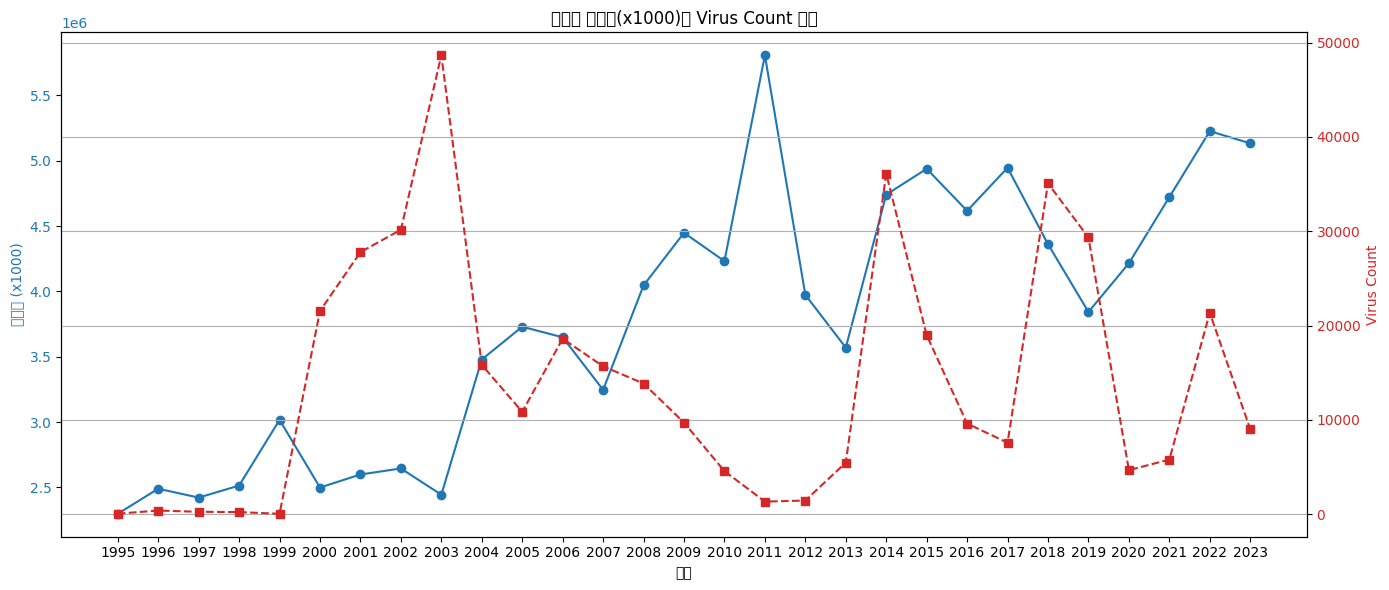

ÏÉÅÍ¥ÄÍ≥ÑÏàò:
                  ÎèÑÏ∂ïÍ∞Ä  Virus Count
ÎèÑÏ∂ïÍ∞Ä          1.000000    -0.053717
Virus Count -0.053717     1.000000


In [84]:
import matplotlib.pyplot as plt
import pandas as pd

df_price['Ïó∞ÎèÑ'] = df_price['Ïó∞ÎèÑ'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)

# Î≥ëÌï©
df_merged = pd.merge(df_price, df_virus, left_on='Ïó∞ÎèÑ', right_on='Year')

# Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(df_merged)

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
fig, ax1 = plt.subplots(figsize=(14, 6))

# Ï≤´ Î≤àÏß∏ yÏ∂ï (ÏôºÏ™Ω): ÎèÑÏ∂ïÍ∞Ä (Îã®ÏúÑ √ó1000)
color = 'tab:blue'
ax1.set_xlabel('Ïó∞ÎèÑ')
ax1.set_ylabel('ÎèÑÏ∂ïÍ∞Ä (x1000)', color=color)
ax1.plot(df_merged['Ïó∞ÎèÑ'], df_merged['ÎèÑÏ∂ïÍ∞Ä'] * 1000, marker='o', linestyle='-', color=color, label='ÎèÑÏ∂ïÍ∞Ä (x1000)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df_merged['Ïó∞ÎèÑ'])

# Îëê Î≤àÏß∏ yÏ∂ï (Ïò§Î•∏Ï™Ω): Virus Count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Virus Count', color=color)
ax2.plot(df_merged['Ïó∞ÎèÑ'], df_merged['Virus Count'], marker='s', linestyle='--', color=color, label='Virus Count')
ax2.tick_params(axis='y', labelcolor=color)

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Íæ∏ÎØ∏Í∏∞
plt.title('Ïó∞ÎèÑÎ≥Ñ ÎèÑÏ∂ïÍ∞Ä(x1000)ÏôÄ Virus Count Î≥ÄÌôî')
fig.tight_layout()
plt.grid(True)

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
correlation = df_merged[['ÎèÑÏ∂ïÍ∞Ä', 'Virus Count']].corr()
print("ÏÉÅÍ¥ÄÍ≥ÑÏàò:")
print(correlation)


/tmp/ipykernel_30626/1676802944.py:31: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/1676802944.py:31: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/1676802944.py:31: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/1676802944.py:31: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/1676802944.py:31: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/1676802944.py:31: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/1676802944.py:31: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fi

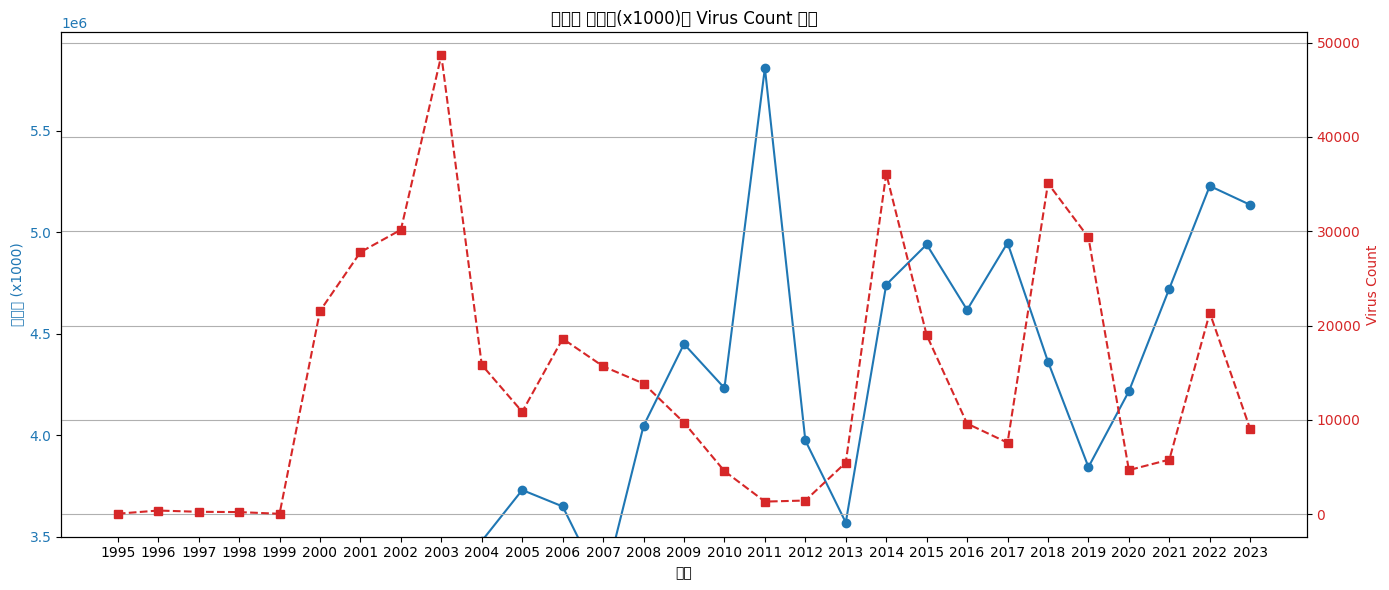

ÏÉÅÍ¥ÄÍ≥ÑÏàò:
                  ÎèÑÏ∂ïÍ∞Ä  Virus Count
ÎèÑÏ∂ïÍ∞Ä          1.000000    -0.053717
Virus Count -0.053717     1.000000


In [85]:
import matplotlib.pyplot as plt
import pandas as pd

df_price['Ïó∞ÎèÑ'] = df_price['Ïó∞ÎèÑ'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)

# Î≥ëÌï©
df_merged = pd.merge(df_price, df_virus, left_on='Ïó∞ÎèÑ', right_on='Year')

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
fig, ax1 = plt.subplots(figsize=(14, 6))

# Ï≤´ Î≤àÏß∏ yÏ∂ï (ÏôºÏ™Ω): ÎèÑÏ∂ïÍ∞Ä (Îã®ÏúÑ √ó1000)
color = 'tab:blue'
ax1.set_xlabel('Ïó∞ÎèÑ')
ax1.set_ylabel('ÎèÑÏ∂ïÍ∞Ä (x1000)', color=color)
ax1.plot(df_merged['Ïó∞ÎèÑ'], df_merged['ÎèÑÏ∂ïÍ∞Ä'] * 1000, marker='o', linestyle='-', color=color, label='ÎèÑÏ∂ïÍ∞Ä (x1000)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df_merged['Ïó∞ÎèÑ'])
ax1.set_ylim(bottom=3500 * 1000)  # üí° ÎèÑÏ∂ïÍ∞Ä yÏ∂ï Î≤îÏúÑ ÏãúÏûëÏ†ê ÏÑ§Ï†ï

# Îëê Î≤àÏß∏ yÏ∂ï (Ïò§Î•∏Ï™Ω): Virus Count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Virus Count', color=color)
ax2.plot(df_merged['Ïó∞ÎèÑ'], df_merged['Virus Count'], marker='s', linestyle='--', color=color, label='Virus Count')
ax2.tick_params(axis='y', labelcolor=color)

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Íæ∏ÎØ∏Í∏∞
plt.title('Ïó∞ÎèÑÎ≥Ñ ÎèÑÏ∂ïÍ∞Ä(x1000)ÏôÄ Virus Count Î≥ÄÌôî')
fig.tight_layout()
plt.grid(True)

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
correlation = df_merged[['ÎèÑÏ∂ïÍ∞Ä', 'Virus Count']].corr()
print("ÏÉÅÍ¥ÄÍ≥ÑÏàò:")
print(correlation)


/tmp/ipykernel_30626/32571349.py:34: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/32571349.py:34: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/32571349.py:34: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/32571349.py:34: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/32571349.py:34: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/32571349.py:34: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/32571349.py:34: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/

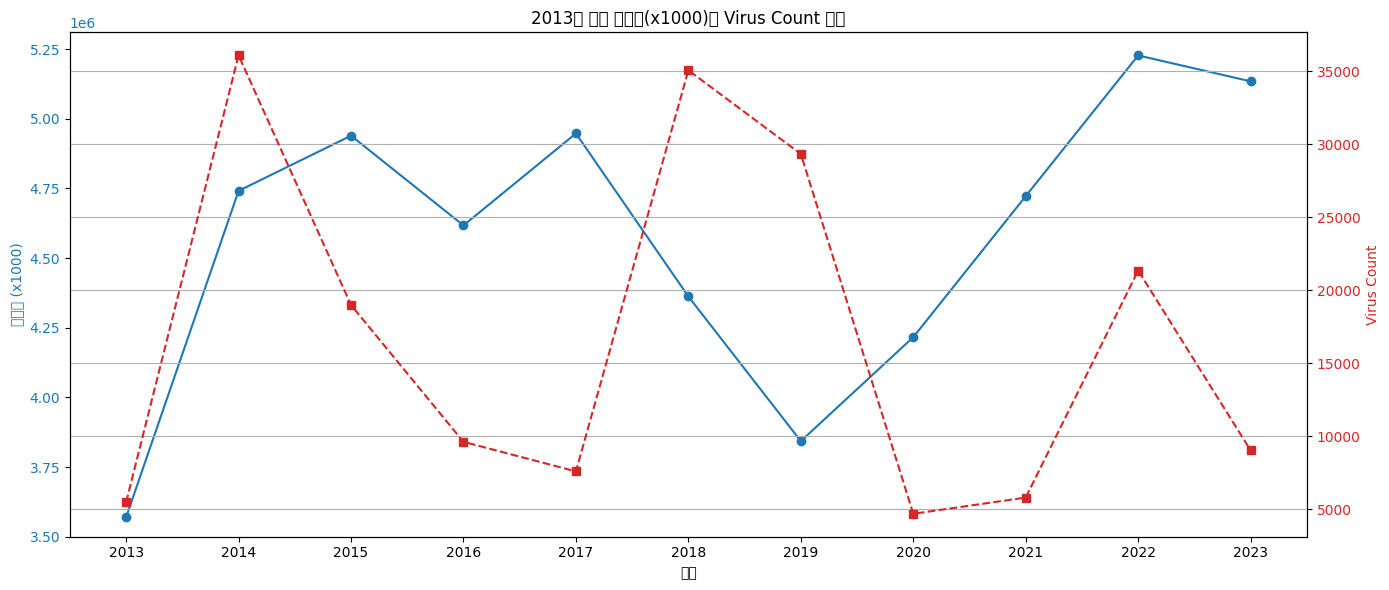

ÏÉÅÍ¥ÄÍ≥ÑÏàò:
                  ÎèÑÏ∂ïÍ∞Ä  Virus Count
ÎèÑÏ∂ïÍ∞Ä          1.000000    -0.001025
Virus Count -0.001025     1.000000


In [86]:
import matplotlib.pyplot as plt
import pandas as pd

df_price['Ïó∞ÎèÑ'] = df_price['Ïó∞ÎèÑ'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)

# Î≥ëÌï©
df_merged = pd.merge(df_price, df_virus, left_on='Ïó∞ÎèÑ', right_on='Year')

# ‚úÖ 2013ÎÖÑ Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉù
df_merged = df_merged[df_merged['Ïó∞ÎèÑ'] >= 2013]

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
fig, ax1 = plt.subplots(figsize=(14, 6))

# Ï≤´ Î≤àÏß∏ yÏ∂ï (ÏôºÏ™Ω): ÎèÑÏ∂ïÍ∞Ä (Îã®ÏúÑ √ó1000)
color = 'tab:blue'
ax1.set_xlabel('Ïó∞ÎèÑ')
ax1.set_ylabel('ÎèÑÏ∂ïÍ∞Ä (x1000)', color=color)
ax1.plot(df_merged['Ïó∞ÎèÑ'], df_merged['ÎèÑÏ∂ïÍ∞Ä'] * 1000, marker='o', linestyle='-', color=color, label='ÎèÑÏ∂ïÍ∞Ä (x1000)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df_merged['Ïó∞ÎèÑ'])
ax1.set_ylim(bottom=3500 * 1000)  # yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à

# Îëê Î≤àÏß∏ yÏ∂ï (Ïò§Î•∏Ï™Ω): Virus Count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Virus Count', color=color)
ax2.plot(df_merged['Ïó∞ÎèÑ'], df_merged['Virus Count'], marker='s', linestyle='--', color=color, label='Virus Count')
ax2.tick_params(axis='y', labelcolor=color)

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Íæ∏ÎØ∏Í∏∞
plt.title('2013ÎÖÑ Ïù¥ÌõÑ ÎèÑÏ∂ïÍ∞Ä(x1000)ÏôÄ Virus Count Î≥ÄÌôî')
fig.tight_layout()
plt.grid(True)

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
correlation = df_merged[['ÎèÑÏ∂ïÍ∞Ä', 'Virus Count']].corr()
print("ÏÉÅÍ¥ÄÍ≥ÑÏàò:")
print(correlation)


In [87]:
df_merged['Virus Count (Ï†ÑÎÖÑÎèÑ)'] = df_merged['Virus Count'].shift(1)
df_merged[['ÎèÑÏ∂ïÍ∞Ä', 'Virus Count (Ï†ÑÎÖÑÎèÑ)']].corr()


ÎèÑÏ∂ïÍ∞Ä  Virus Count (Ï†ÑÎÖÑÎèÑ)
ÎèÑÏ∂ïÍ∞Ä                1.000000          -0.418443
Virus Count (Ï†ÑÎÖÑÎèÑ) -0.418443           1.000000

In [88]:
for i in range(1, 4):
    df_merged[f'Virus Count (-{i}ÎÖÑ)'] = df_merged['Virus Count'].shift(i)
    print(f"ÏãúÏ∞® {i}ÎÖÑ vs ÎèÑÏ∂ïÍ∞Ä: ", df_merged[['ÎèÑÏ∂ïÍ∞Ä', f'Virus Count (-{i}ÎÖÑ)']].corr().iloc[0, 1])


ÏãúÏ∞® 1ÎÖÑ vs ÎèÑÏ∂ïÍ∞Ä:  -0.41844322892323904
ÏãúÏ∞® 2ÎÖÑ vs ÎèÑÏ∂ïÍ∞Ä:  -0.2718128449211686
ÏãúÏ∞® 3ÎÖÑ vs ÎèÑÏ∂ïÍ∞Ä:  0.4067781622987559


/tmp/ipykernel_30626/2706557659.py:36: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2706557659.py:36: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2706557659.py:36: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2706557659.py:36: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2706557659.py:36: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2706557659.py:36: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2706557659.py:36: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.

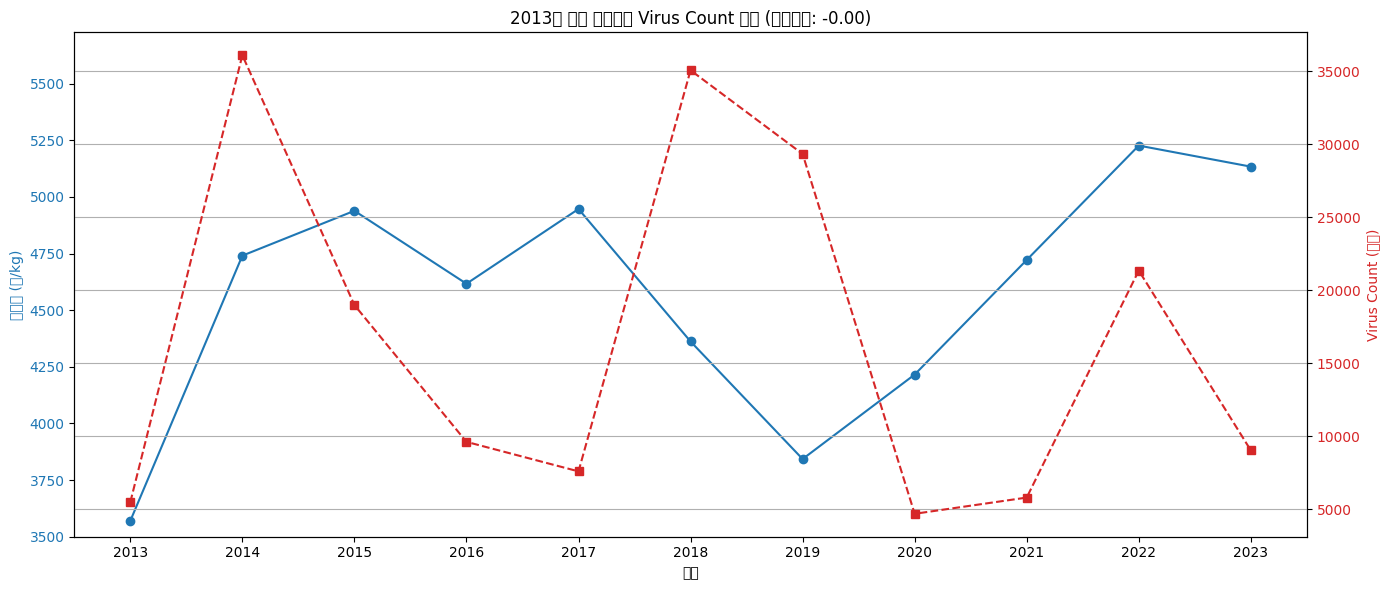

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# Ï†ÑÏ≤òÎ¶¨
df_price['Ïó∞ÎèÑ'] = df_price['Ïó∞ÎèÑ'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)
df_merged = pd.merge(df_price, df_virus, left_on='Ïó∞ÎèÑ', right_on='Year')
df_merged = df_merged[df_merged['Ïó∞ÎèÑ'] >= 2013]

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr_value = df_merged[['ÎèÑÏ∂ïÍ∞Ä', 'Virus Count']].corr().iloc[0, 1]

# Í∑∏ÎûòÌîÑ
fig, ax1 = plt.subplots(figsize=(14, 6))

# ÎèÑÏ∂ïÍ∞Ä - ÏôºÏ™Ω yÏ∂ï
color1 = 'tab:blue'
ax1.set_xlabel('Ïó∞ÎèÑ')
ax1.set_ylabel('ÎèÑÏ∂ïÍ∞Ä (Ïõê/kg)', color=color1)
ax1.plot(df_merged['Ïó∞ÎèÑ'], df_merged['ÎèÑÏ∂ïÍ∞Ä'], marker='o', linestyle='-', color=color1, label='ÎèÑÏ∂ïÍ∞Ä')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(3500, df_merged['ÎèÑÏ∂ïÍ∞Ä'].max() + 500)
ax1.set_xticks(df_merged['Ïó∞ÎèÑ'])

# Virus Count - Ïò§Î•∏Ï™Ω yÏ∂ï
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Virus Count (Í±¥Ïàò)', color=color2)
ax2.plot(df_merged['Ïó∞ÎèÑ'], df_merged['Virus Count'], marker='s', linestyle='--', color=color2, label='Virus Count')
ax2.tick_params(axis='y', labelcolor=color2)

# Ï†úÎ™©Ïóê ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌëúÏãú
plt.title(f'2013ÎÖÑ Ïù¥ÌõÑ ÎèÑÏ∂ïÍ∞ÄÏôÄ Virus Count Î≥ÄÌôî (ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr_value:.2f})')

# Í∏∞ÌÉÄ ÏÑ§Ï†ï
fig.tight_layout()
plt.grid(True)
plt.show()


In [90]:
# Í∏∞Î≥∏ Î≥ëÌï©
df_price['Ïó∞ÎèÑ'] = df_price['Ïó∞ÎèÑ'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)
df_merged = pd.merge(df_price, df_virus, left_on='Ïó∞ÎèÑ', right_on='Year')
df_merged = df_merged[df_merged['Ïó∞ÎèÑ'] >= 2013].copy()

# ÏãúÏ∞® Î≥ÄÏàò ÏÉùÏÑ± (1~3ÎÖÑ Ï†Ñ Virus Count)
for i in range(1, 4):
    df_merged[f'Virus Count (-{i}ÎÖÑ)'] = df_merged['Virus Count'].shift(i)

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
for i in range(1, 4):
    corr = df_merged[['ÎèÑÏ∂ïÍ∞Ä', f'Virus Count (-{i}ÎÖÑ)']].corr().iloc[0, 1]
    print(f"üìä ÏãúÏ∞® {i}ÎÖÑ - ÎèÑÏ∂ïÍ∞ÄÏôÄÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr:.2f}")


üìä ÏãúÏ∞® 1ÎÖÑ - ÎèÑÏ∂ïÍ∞ÄÏôÄÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.42
üìä ÏãúÏ∞® 2ÎÖÑ - ÎèÑÏ∂ïÍ∞ÄÏôÄÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.27
üìä ÏãúÏ∞® 3ÎÖÑ - ÎèÑÏ∂ïÍ∞ÄÏôÄÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.41


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SY

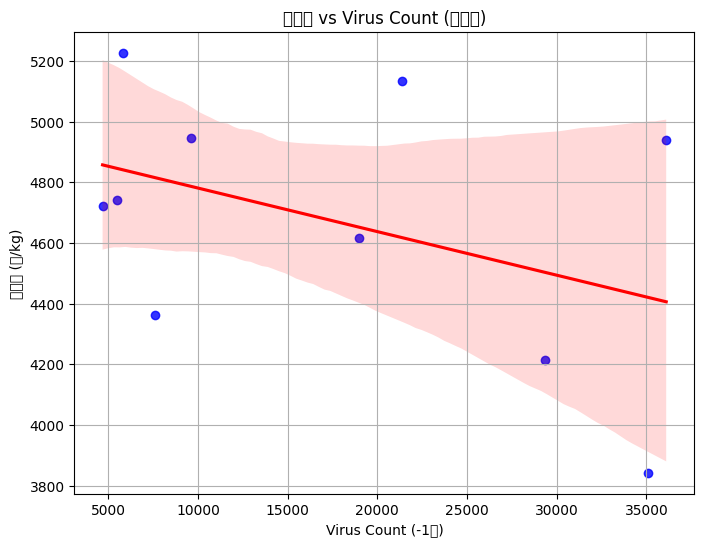

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÏ∞® 1ÎÖÑ ÏÇ∞Ï†êÎèÑ + ÌöåÍ∑ÄÏÑ†
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_merged,
    x='Virus Count (-1ÎÖÑ)',
    y='ÎèÑÏ∂ïÍ∞Ä',
    marker='o',
    line_kws={"color": "red"},
    scatter_kws={"color": "blue"}
)
plt.title('ÎèÑÏ∂ïÍ∞Ä vs Virus Count (Ï†ÑÎÖÑÎèÑ)')
plt.xlabel('Virus Count (-1ÎÖÑ)')
plt.ylabel('ÎèÑÏ∂ïÍ∞Ä (Ïõê/kg)')
plt.grid(True)
plt.show()


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48148 (\N{HANGUL SY

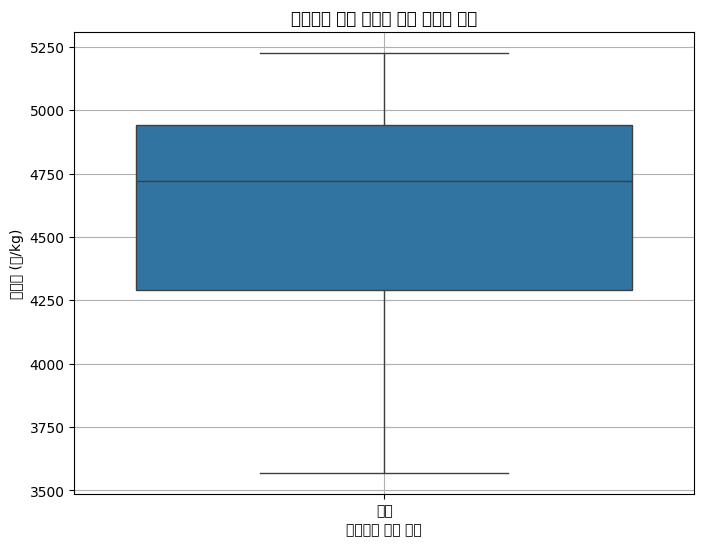

In [92]:
# Î∞îÏù¥Îü¨Ïä§ Ïú†Î¨¥ Í∏∞Ï§Ä (Í±¥Ïàò 0 Ïù¥ÏÉÅÏù¥Î©¥ Î∞úÏÉùÏúºÎ°ú Í∞ÑÏ£º)
df_merged['Virus_Occurred'] = df_merged['Virus Count'].apply(lambda x: 'Î∞úÏÉù' if x > 0 else 'Î¨¥Î∞úÏÉù')

# BoxplotÏúºÎ°ú ÎπÑÍµê
plt.figure(figsize=(8, 6))
sns.boxplot(x='Virus_Occurred', y='ÎèÑÏ∂ïÍ∞Ä', data=df_merged)
plt.title('Î∞îÏù¥Îü¨Ïä§ Î∞úÏÉù Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÎèÑÏ∂ïÍ∞Ä ÎπÑÍµê')
plt.xlabel('Î∞îÏù¥Îü¨Ïä§ Î∞úÏÉù Ïó¨Î∂Ä')
plt.ylabel('ÎèÑÏ∂ïÍ∞Ä (Ïõê/kg)')
plt.grid(True)
plt.show()


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANG

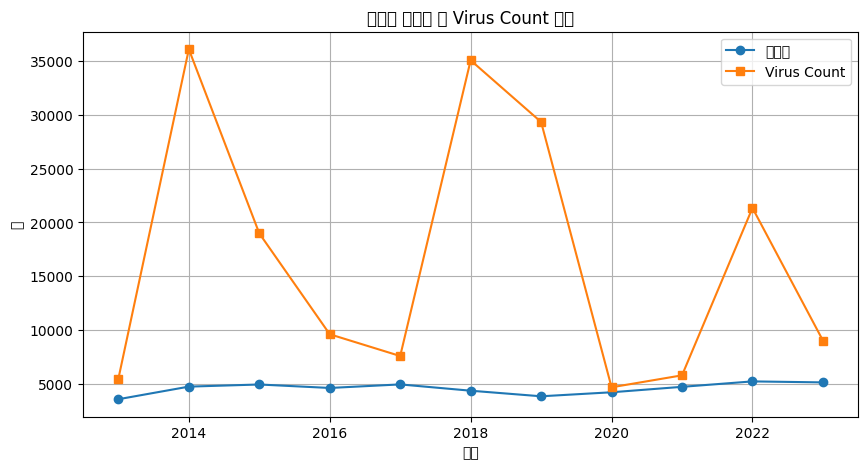

In [93]:
# Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10, 5))
plt.plot(df_merged['Ïó∞ÎèÑ'], df_merged['ÎèÑÏ∂ïÍ∞Ä'], label='ÎèÑÏ∂ïÍ∞Ä', marker='o')
plt.plot(df_merged['Ïó∞ÎèÑ'], df_merged['Virus Count'], label='Virus Count', marker='s')
plt.title('Ïó∞ÎèÑÎ≥Ñ ÎèÑÏ∂ïÍ∞Ä Î∞è Virus Count Î≥ÄÌôî')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('Í∞í')
plt.legend()
plt.grid(True)
plt.show()


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


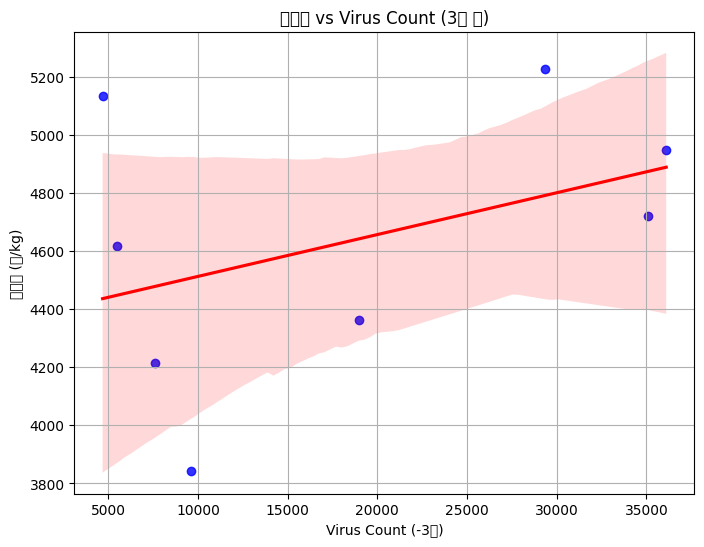

In [94]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_merged,
    x='Virus Count (-3ÎÖÑ)',
    y='ÎèÑÏ∂ïÍ∞Ä',
    marker='o',
    line_kws={"color": "red"},
    scatter_kws={"color": "blue"}
)
plt.title('ÎèÑÏ∂ïÍ∞Ä vs Virus Count (3ÎÖÑ Ï†Ñ)')
plt.xlabel('Virus Count (-3ÎÖÑ)')
plt.ylabel('ÎèÑÏ∂ïÍ∞Ä (Ïõê/kg)')
plt.grid(True)
plt.show()


In [98]:
from sklearn.linear_model import LinearRegression
import numpy as np

# NaN Ï†úÍ±∞
df_reg = df_merged[['ÎèÑÏ∂ïÍ∞Ä', 'Virus Count (-3ÎÖÑ)']].dropna()

# Î≥ÄÏàò Î∂ÑÎ¶¨
X = df_reg[['Virus Count (-3ÎÖÑ)']]
y = df_reg['ÎèÑÏ∂ïÍ∞Ä']

# Î™®Îç∏ Ï†ÅÌï©
model = LinearRegression()
model.fit(X, y)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Í∏∞Ïö∏Í∏∞ (coef): {model.coef_[0]:.2f}")
print(f"Ï†àÌé∏ (intercept): {model.intercept_:.2f}")
print(f"R¬≤ (ÏÑ§Î™ÖÎ†•): {model.score(X, y):.2f}")


Í∏∞Ïö∏Í∏∞ (coef): 0.01
Ï†àÌé∏ (intercept): 4369.03
R¬≤ (ÏÑ§Î™ÖÎ†•): 0.17


/tmp/ipykernel_30626/3485902907.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_feed = pd.read_sql(query, conn)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/c

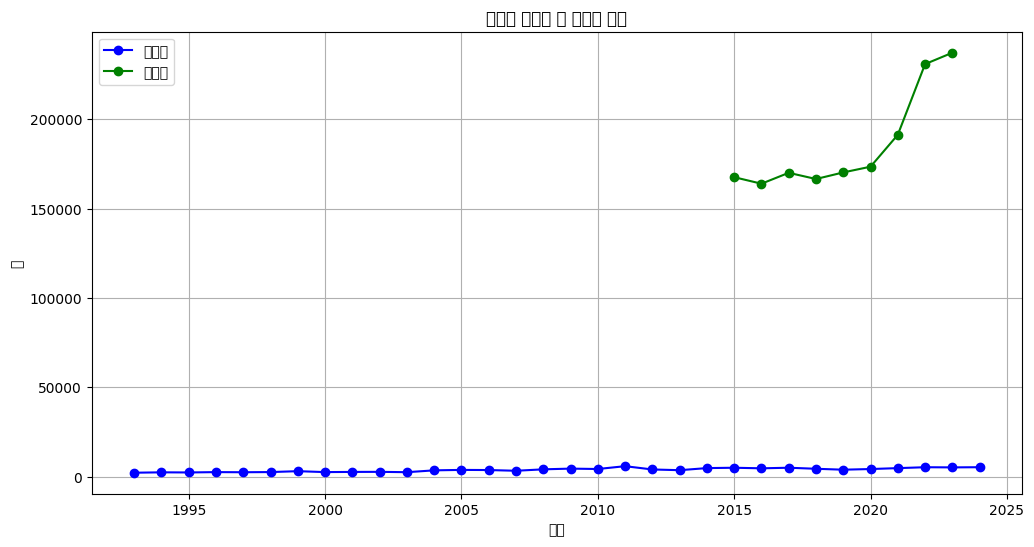

/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SY

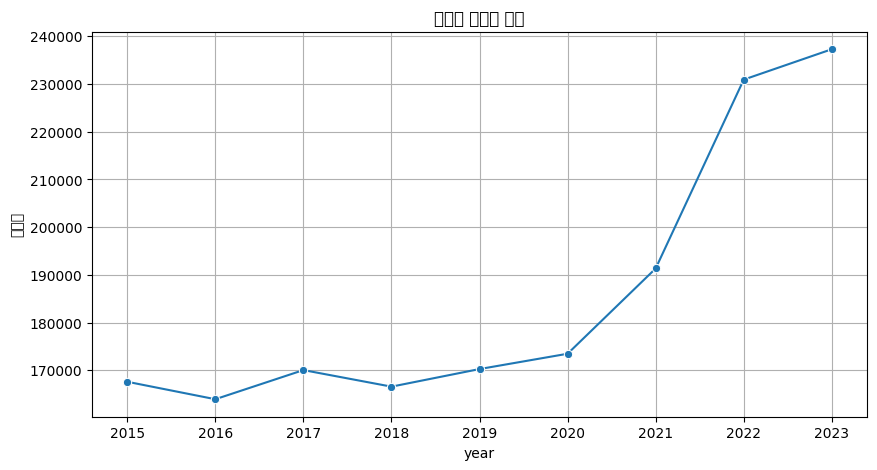

In [108]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

# ‚úÖ RDS Ï†ëÏÜç Ï†ïÎ≥¥
conn = pymysql.connect(
    host='database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='psy',
    password='0000',
    database='pig',
    charset='utf8mb4'
)

# ‚úÖ feed ÌÖåÏù¥Î∏î Î∂àÎü¨Ïò§Í∏∞ (ÏÇ¨Î£åÎπÑ)
query = "SELECT * FROM feed"
df_feed = pd.read_sql(query, conn)

# ‚úÖ Ïó∞Í≤∞ Ï¢ÖÎ£å
conn.close()

# ‚úÖ Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑† ÏÇ¨Î£åÎπÑ Í≥ÑÏÇ∞
yearly_feed = df_feed.groupby('year').mean(numeric_only=True).reset_index()

# ‚úÖ ÎèÑÏ∂ïÍ∞Ä Ï†ÑÏ≤òÎ¶¨
df_price['ÎèÑÏ∂ïÍ∞Ä'] = pd.to_numeric(
    df_price['ÎèÑÏ∂ïÍ∞Ä'].astype(str).str.replace(',', ''), errors='coerce'
)

# ‚úÖ ÏãúÍ∞ÅÌôî: ÎèÑÏ∂ïÍ∞Ä & ÏÇ¨Î£åÎπÑ Î≥ÄÌôî
plt.figure(figsize=(12, 6))
plt.plot(df_price['Ïó∞ÎèÑ'], df_price['ÎèÑÏ∂ïÍ∞Ä'], marker='o', linestyle='-', color='b', label='ÎèÑÏ∂ïÍ∞Ä')
plt.plot(yearly_feed['year'], yearly_feed['ÏÇ¨Î£åÎπÑ'], marker='o', linestyle='-', color='g', label='ÏÇ¨Î£åÎπÑ')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('Í∞í')
plt.title('Ïó∞ÎèÑÎ≥Ñ ÎèÑÏ∂ïÍ∞Ä Î∞è ÏÇ¨Î£åÎπÑ Î≥ÄÌôî')
plt.grid(True)
plt.legend()
plt.show()

# ‚úÖ ÏãúÍ∞ÅÌôî: ÏÇ¨Î£åÎπÑ Îã®ÎèÖ Ï∂îÏù¥
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_feed, x='year', y='ÏÇ¨Î£åÎπÑ', marker='o')
plt.title('Ïó∞ÎèÑÎ≥Ñ ÏÇ¨Î£åÎπÑ Ï∂îÏù¥')
plt.grid(True)
plt.show()


/tmp/ipykernel_30626/3820212079.py:20: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/3820212079.py:20: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/3820212079.py:20: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/3820212079.py:20: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/3820212079.py:20: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/3820212079.py:20: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/3820212079.py:20: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.t

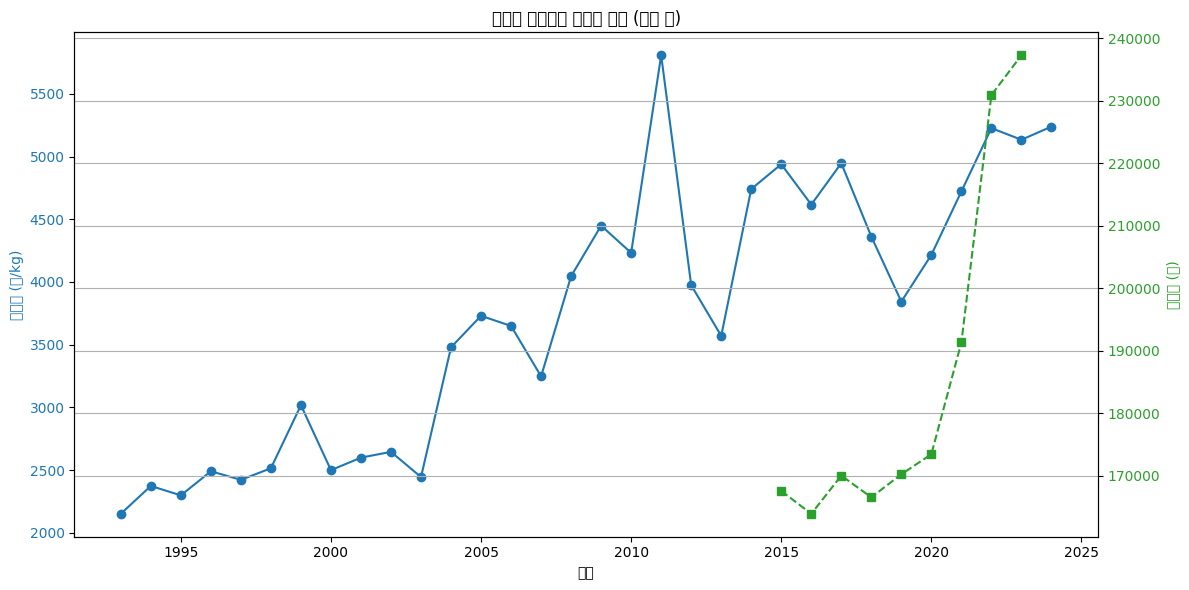

In [109]:
# Ïù¥Ï§ë yÏ∂ï Í∑∏ÎûòÌîÑ
fig, ax1 = plt.subplots(figsize=(12, 6))

# ÎèÑÏ∂ïÍ∞Ä (ÏôºÏ™Ω yÏ∂ï)
color1 = 'tab:blue'
ax1.set_xlabel('Ïó∞ÎèÑ')
ax1.set_ylabel('ÎèÑÏ∂ïÍ∞Ä (Ïõê/kg)', color=color1)
ax1.plot(df_price['Ïó∞ÎèÑ'], df_price['ÎèÑÏ∂ïÍ∞Ä'], marker='o', color=color1, label='ÎèÑÏ∂ïÍ∞Ä')
ax1.tick_params(axis='y', labelcolor=color1)

# ÏÇ¨Î£åÎπÑ (Ïò§Î•∏Ï™Ω yÏ∂ï)
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('ÏÇ¨Î£åÎπÑ (Ïõê)', color=color2)
ax2.plot(yearly_feed['year'], yearly_feed['ÏÇ¨Î£åÎπÑ'], marker='s', linestyle='--', color=color2, label='ÏÇ¨Î£åÎπÑ')
ax2.tick_params(axis='y', labelcolor=color2)

# Ï†úÎ™© Î∞è Íæ∏ÎØ∏Í∏∞
plt.title('Ïó∞ÎèÑÎ≥Ñ ÎèÑÏ∂ïÍ∞ÄÏôÄ ÏÇ¨Î£åÎπÑ Î≥ÄÌôî (Ïù¥Ï§ë Ï∂ï)')
fig.tight_layout()
plt.grid(True)
plt.show()


/tmp/ipykernel_30626/2336121204.py:25: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2336121204.py:25: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2336121204.py:25: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2336121204.py:25: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2336121204.py:25: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2336121204.py:25: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2336121204.py:25: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.t

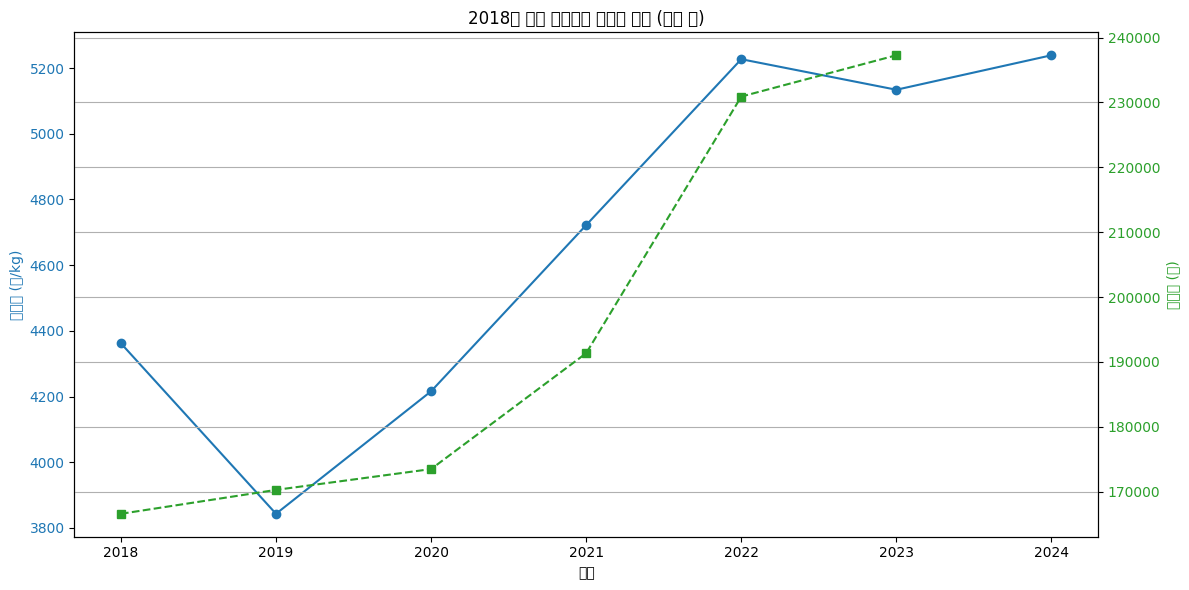

In [110]:
# 2018ÎÖÑ Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
df_price_filtered = df_price[df_price['Ïó∞ÎèÑ'] >= 2018]
yearly_feed_filtered = yearly_feed[yearly_feed['year'] >= 2018]

# Ïù¥Ï§ë yÏ∂ï Í∑∏ÎûòÌîÑ
fig, ax1 = plt.subplots(figsize=(12, 6))

# ÎèÑÏ∂ïÍ∞Ä (ÏôºÏ™Ω yÏ∂ï)
color1 = 'tab:blue'
ax1.set_xlabel('Ïó∞ÎèÑ')
ax1.set_ylabel('ÎèÑÏ∂ïÍ∞Ä (Ïõê/kg)', color=color1)
ax1.plot(df_price_filtered['Ïó∞ÎèÑ'], df_price_filtered['ÎèÑÏ∂ïÍ∞Ä'], marker='o', linestyle='-', color=color1, label='ÎèÑÏ∂ïÍ∞Ä')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(df_price_filtered['Ïó∞ÎèÑ'])

# ÏÇ¨Î£åÎπÑ (Ïò§Î•∏Ï™Ω yÏ∂ï)
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('ÏÇ¨Î£åÎπÑ (Ïõê)', color=color2)
ax2.plot(yearly_feed_filtered['year'], yearly_feed_filtered['ÏÇ¨Î£åÎπÑ'], marker='s', linestyle='--', color=color2, label='ÏÇ¨Î£åÎπÑ')
ax2.tick_params(axis='y', labelcolor=color2)

# Ï†úÎ™© Î∞è Íæ∏ÎØ∏Í∏∞
plt.title('2018ÎÖÑ Ïù¥ÌõÑ ÎèÑÏ∂ïÍ∞ÄÏôÄ ÏÇ¨Î£åÎπÑ Î≥ÄÌôî (Ïù¥Ï§ë Ï∂ï)')
fig.tight_layout()
plt.grid(True)
plt.show()


In [113]:
from meteostat import Monthly, Point
import pandas as pd
from datetime import datetime

# ÏúÑÏπò (ÏÑúÏö∏ ÏòàÏãú)
seoul = Point(37.5665, 126.9780)

# Í∏∞Í∞Ñ ÏÑ§Ï†ï
start = datetime(2023, 1, 1)
end = datetime(2023, 12, 31)

# Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
data = Monthly(seoul, start, end)
df = data.fetch()
print(df)


            tavg  tmin  tmax   prcp  wspd    pres  tsun
time                                                   
2023-01-01  -1.4  -5.6   3.0   44.0   8.7  1024.7   NaN
2023-02-01   2.4  -1.7   7.1    1.2   8.2  1025.6   NaN
2023-03-01   9.8   4.3  15.9   16.6   8.4  1019.8   NaN
2023-04-01  13.8   9.0  18.8   92.7   9.1  1014.2   NaN
2023-05-01  19.7  14.7  24.9   82.4   8.4  1012.4   NaN
2023-06-01  23.4  19.8  27.7  134.0   7.9  1006.3   NaN
2023-07-01  26.7  23.9  30.0  305.7   7.7  1006.5   NaN
2023-08-01  27.1  24.4  30.6  324.6   7.8  1004.8   NaN
2023-09-01  23.6  20.3  27.4  137.7   7.3  1012.3   NaN
2023-10-01  15.8  11.6  20.8   42.8   6.9  1018.1   NaN
2023-11-01   6.6   3.0  11.4  129.9   9.1  1021.0   NaN
2023-12-01   1.2  -2.4   5.1   91.5   9.2  1024.3   NaN
